In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_row',1000)

In [19]:
data = pd.read_csv('data/Mydata.csv')
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,UNEMPFORECAST,TOT,PC_LF,A,1960,5.561643,NaN
1,USA,UNEMPFORECAST,TOT,PC_LF,A,1961,6.679450,NaN
2,USA,UNEMPFORECAST,TOT,PC_LF,A,1962,5.547695,NaN
3,USA,UNEMPFORECAST,TOT,PC_LF,A,1963,5.643426,NaN
4,USA,UNEMPFORECAST,TOT,PC_LF,A,1964,5.166907,NaN


In [38]:
dd = data.loc[:,['TIME','Value']]
# 单取所需两列
# loc用法
dd.columns=['year','rate']
dd['missing']=dd['rate']
mis_index = dd.sample(frac=0.1).index
dd.loc[mis_index,'missing']=None
# 新增缺值列，并随机确定缺值

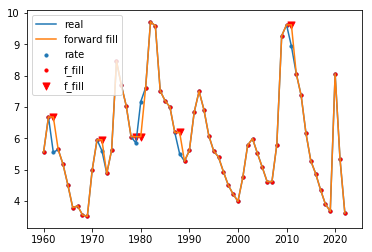

In [39]:
dd['f_fill']=dd['missing']
dd['f_fill'].ffill(inplace=True)
# forward_fill 前一时间节点数据填充缺值

plt.scatter(dd.year,dd.rate,s=10)
plt.plot(dd.year,dd.rate,label='real')

plt.scatter(dd[~dd.index.isin(mis_index)].year,dd[~dd.index.isin(mis_index)].f_fill,s=10,c='r')
# 圆点画非插值点
plt.scatter(dd[dd.index.isin(mis_index)].year,dd[dd.index.isin(mis_index)].f_fill,s=50,c='r',marker='v')
# 插值点用特殊符号
plt.plot(dd.year,dd.f_fill,label='forward fill')
# 作插值图
plt.legend()

In [40]:
dd['moveavg']=np.where(dd['missing'].isnull(),
                       dd['missing'].shift(1).rolling(3,min_periods=1).mean(),
                       dd['missing'])
# 移动平均值填充（前x项平均数填充）
# .shift 将数组移位 行号1 -> 2 ; .rolling 作移动计算 
# eg. arr = [100,200,300]  
# arr.rolling(3).sum() --> [100,300,600]  0+0+100,0+100+200,100+200+300
# min_period 参数: 指定最小元素数.  
# =1:不够三个时，只要满足 >最小数目1 即可
dd.head()

,year,rate,missing,f_fill,moveavg
0,1960,5.561643,5.561643,5.561643,5.561643
1,1961,6.679450,6.679450,6.679450,6.679450
2,1962,5.547695,NaN,6.679450,6.120547
3,1963,5.643426,5.643426,5.643426,5.643426
4,1964,5.166907,5.166907,5.166907,5.166907


In [41]:
dd['inter_lin']=dd['missing'].interpolate(method='linear')
dd['inter_poly']=dd['missing'].interpolate(method='polynomial',order=3)
# 线性/多项式 插值 order:指数
dd.head()

,year,rate,missing,f_fill,moveavg,inter_lin,inter_poly
0,1960,5.561643,5.561643,5.561643,5.561643,5.561643,5.561643
1,1961,6.679450,6.679450,6.679450,6.679450,6.679450,6.679450
2,1962,5.547695,NaN,6.679450,6.120547,6.161438,6.374684
3,1963,5.643426,5.643426,5.643426,5.643426,5.643426,5.643426
4,1964,5.166907,5.166907,5.166907,5.166907,5.166907,5.166907


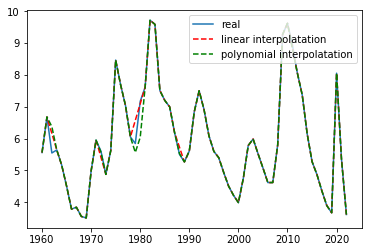

In [42]:
plt.plot(dd.year,dd.rate,label='real')
plt.plot(dd.year,dd.inter_lin,label='linear interpolatation',c='r',linestyle='--')
plt.plot(dd.year,dd.inter_poly,label='polynomial interpolatation',c='g',linestyle='--')
plt.legend()
# 作图